In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [8]:
hrt = pd.read_csv('heart.csv')
hrt.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,NaN,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [3]:
hrt.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [9]:
hrt.shape

(918, 12)

In [10]:
hrt.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,914.000000,915,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,723,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.553611,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.424972,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [11]:
#Checking for null value
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
#Removing null values from age column
avg_age = np.mean(hrt['Age'])
hrt['Age'].fillna(avg_age, inplace=True)

In [15]:
#Removing null values from Sex column
hrt['Sex'].value_counts()

M    723
F    192
Name: Sex, dtype: int64

In [17]:
hrt['Sex'].fillna('M',inplace = True)

hrt.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## EDA

In [19]:
cp = hrt['ChestPainType'].value_counts()
cp

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

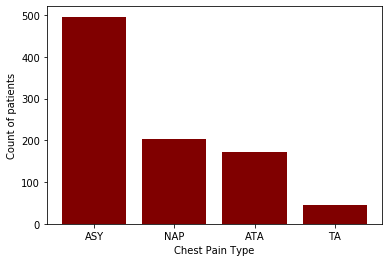

In [20]:
plt.bar(cp.index, cp.values, color = 'Maroon')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of patients')
plt.show()

Above graph shows that maximum patients suffer from ASY type of chest pain and minimum are recoreded with TA type of chest pain

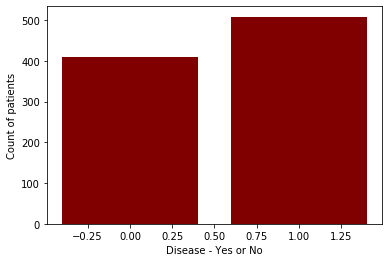

In [21]:
HeartDis = hrt['HeartDisease'].value_counts()
plt.bar(HeartDis.index, HeartDis.values, color = 'Maroon')
plt.xlabel('Disease - Yes or No')
plt.ylabel('Count of patients')
plt.show()

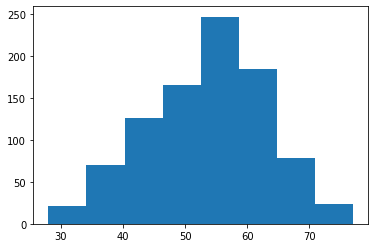

In [24]:
plt.hist(hrt['Age'], bins=8)
plt.show()

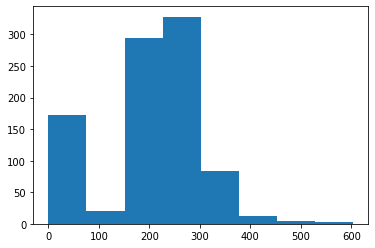

In [25]:
plt.hist(hrt['Cholesterol'], bins=8)
plt.show()

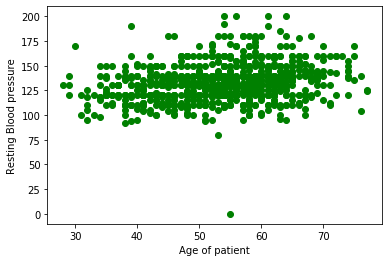

In [29]:
plt.scatter(hrt['Age'], hrt['RestingBP'], color = 'Green')
plt.xlabel('Age of patient')
plt.ylabel('Resting Blood pressure')
plt.show()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

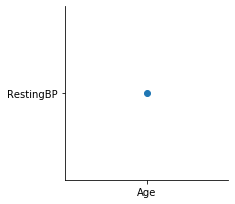

In [32]:
sns.FacetGrid(hrt, hue='HeartDisease')\
.map(plt.scatter('Age','RestingBP'))\
.add_legend()
plt.show()

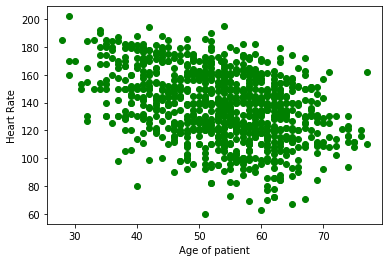

In [33]:
plt.scatter(hrt['Age'], hrt['MaxHR'], color = 'Green')
plt.xlabel('Age of patient')
plt.ylabel('Heart Rate')
plt.show()